In [26]:
# Numpy and Pandas
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import std
import time
# Iterative Stratification untuk cross validation multilabel
from skmultilearn.model_selection import IterativeStratification
#Import Tensorflow dan extension
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.backend import sigmoid
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop, Adadelta
import xgboost as xgb
#Import keras tuner dan metrics untuk tuning parameter
import kerastuner as kt
from kerastuner.tuners import RandomSearch, BayesianOptimization, Sklearn
from sklearn import metrics
import tensorflow_addons as tfa

#
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

In [2]:
#Modifikasi IterativeStratification agar hasil random data tetap sama

def new_init(self, n_splits=3, order=1, sample_distribution_per_fold = None, random_state=None):

                  self.order = order
                  if random_state is not None:
                      do_shuffle = True
                  else:
                      do_shuffle = False
                  super(
                      IterativeStratification,
                      self).__init__(n_splits,
                                     shuffle=do_shuffle,
                                     random_state=random_state)
                  if sample_distribution_per_fold:
                      self.percentage_per_fold = sample_distribution_per_fold
                  else:
                      self.percentage_per_fold = [1 / float(self.n_splits) for _ in range(self.n_splits)]
    
IterativeStratification.__init__ = new_init

In [20]:
#Import Dataset
dataset_pepi = pd.read_csv('E:/Projek Pak Wisnu/Projek Peptide-Protein Interaction/dataset pepPi.csv')
# dataset_circular = pd.read_csv('E:/Projek pak Sony/com_fp_circular.csv')
# dataset_maccs = pd.read_csv('E:/Projek pak Sony/com_fp_maccs.csv')
kelasdata = pd.read_csv('E:/Projek Pak Wisnu/Projek Peptide-Protein Interaction/kelasdatacomplete.csv')
X_pepi = dataset_pepi.drop("pdb_chain", axis =1 )
# X_cl = dataset_circular.drop("CID",axis=1)
# X_mc = dataset_maccs.drop("CID",axis=1)
Y = np.array(kelasdata)
X_pepi
kelasdata

,Unknown0_L,Unknown1_A,Unknown2_A,Unknown3_A,Unknown4_B,Unknown5_H,Unknown6_L,Unknown7_H,Unknown8_L,Unknown9_A,...,A7MB62_B,Q58CQ2_C,Q3MHR7_D,Q3SYX9_G,Q148J6_F,Q3T035_E,P83111_A,Q946J8_A,Q8CJ12_R,Q03164_B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_pepi

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,-3.555556,-0.222222,-9.388889,-9.388889,-12.500000,-0.888889,-2.722222,-0.055556,-1.388889,-0.888889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.726331,-0.998028,-2.879684,-1.140533,-2.390533,-1.181460,-1.501479,-0.825444,-2.584813,-1.642505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.252232,-0.392857,-3.330357,-4.187500,-3.859375,-0.859375,-1.758929,-2.794643,-1.698661,-0.937500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.197279,-0.394558,-3.935374,-5.292517,-5.217687,-0.833333,-1.965986,-1.673469,-0.513605,-1.336735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.252232,-0.392857,-3.330357,-4.187500,-3.859375,-0.859375,-1.758929,-2.794643,-1.698661,-0.937500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,-0.417432,0.147673,-1.082674,-0.412156,-2.529018,-0.221325,-0.857761,-0.446713,-0.805054,-0.704706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6985,-0.778409,-1.131313,-2.335859,-0.869318,-2.551136,-1.364268,-1.551136,-0.712753,-2.608586,-1.426768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6986,-9.000000,0.000000,-9.000000,-9.000000,-2.250000,-0.250000,-1.000000,-0.250000,-1.000000,-1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6987,-1.350000,-0.555556,-4.450000,-7.688889,-6.950000,-1.505556,-3.600000,-0.088889,-0.605556,-0.738889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
kelasdata.sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
6984    1
6985    1
6986    1
6987    1
6988    1
Length: 6989, dtype: int64

# SAE MODEL

In [21]:
#Fungsi model SAE
def sae_model(xt, xv = None, EPOCHS = 100,BATCH_SIZE = 32, opt = "adam",
              hl_node = 1024, lr = 0.01,af = "relu",num_layers = 3, do=0.5, fr_node = 0.5,
              verbose = 0,return_fe = False):
  #Setting result placeholders
  xt_ae = [] ;xv_ae = [] ; w_ae = []
  #If validation set is not present, use train set as validation set
  if xv is None :
    xv = xt.copy()
  opt = tf.keras.optimizers.get(opt) #Set optimizer
  K.set_value(opt.learning_rate, lr) #Set learning rate

  #Stacked Autoencoder architecture
  for n_layers in range(num_layers):
    #Autoencoder
    inp = Input(shape=(xt.shape[1],))
    #Apply Dropout
    hidden_layer = Dropout(do)(inp)
    #Layer encoder (jumlah layer sesuai dengan n_layers)
    enc = Dense(int(hl_node*(fr_node**n_layers)), activation = af)(hidden_layer)  
    #Layer Decoder
    dec = Dense(xt.shape[1],activation="linear")(enc)
    ae = Model(inp, dec)
    #Compile model
    ae.compile(optimizer=opt, loss='mean_squared_error')
    #EarlyStop jika sudah konvergen 
    es = EarlyStopping(monitor='val_loss', patience=15, verbose=verbose)
    #Latih model
    ae.fit(xt, xt, 
           epochs=EPOCHS,batch_size=BATCH_SIZE, 
           shuffle=True, callbacks = [es] , verbose = verbose,
           validation_data = (xv,xv))
    #Ekstrak Feature extraction
    fe = Model(ae.input, enc)
    #Simpan data hasil latih
    xt = fe.predict(xt) ; xt_ae.append(xt)
    xv = fe.predict(xv) ; xv_ae.append(xv)
    #Simpan bobot hasil latih SAE
    w_ae.append([layer_name for layer_name in ae.layers if "dense" in layer_name.name][0].get_weights())
    if verbose:
      print("Layer {} trained".format(n_layers+1))

  return (w_ae,xv) if return_fe else w_ae

# BUILD DNN

In [22]:
#Fungsi DNN
def dnn_model(xt, n_outputs = 4655, sae_weights = None, EPOCHS = 100,BATCH_SIZE = 32, opt = "adam",
              hl_node = 1024, lr = 0.01,af = "relu",num_layers = 3, do=0.5, fr_node = 0.5):
  opt = tf.keras.optimizers.get(opt) #Set optimizer
  K.set_value(opt.learning_rate, lr) #Set learning rate
  
  #Model architecture
  input_layer = Input(shape=(xt.shape[1],))
  hidden_layer = BatchNormalization()(input_layer)
  hidden_layer = Dropout(do)(hidden_layer)
#Set jumlah hidden layer
  for n_layers in range(num_layers):
    hidden_layer = Dense(int(hl_node*(fr_node**n_layers)), activation = af)(hidden_layer)
    hidden_layer = BatchNormalization()(hidden_layer)
    hidden_layer = Dropout(do)(hidden_layer)
  output_layer = Dense(n_outputs, activation = 'sigmoid')(hidden_layer)
#latih model
  dnn = Model(input_layer, output_layer)

  #Latih model DNN dengan bobot SAE (jika bobot ada)
  if sae_weights is not None:
    weights = sae_weights
    dnn_dense = [layer_name for layer_name in dnn.layers if "dense" in layer_name.name]
    for weight_from,weight_to in list(zip(weights,dnn_dense)):
      weight_to.set_weights(weight_from)

  #Compile model
  dnn.compile(optimizer=opt, loss='binary_crossentropy', metrics = [
               tf.keras.metrics.Precision(),
               tf.keras.metrics.Recall()],
               )
  return dnn

In [27]:
scaler_all = MinMaxScaler()
X_pepi = pd.DataFrame(data = scaler_all.fit_transform(X_pepi), columns = X_pepi.columns)
X_pepi

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.604938,0.680297,0.000000,0.309852,0.365079,0.409594,0.446328,0.980121,0.680284,0.624588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.919297,0.152567,0.693288,0.916163,0.878576,0.215267,0.694614,0.704634,0.404988,0.306307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.860863,0.564225,0.645287,0.692190,0.803968,0.429197,0.642252,0.000000,0.608976,0.604058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.866969,0.563069,0.580848,0.610964,0.734975,0.446494,0.600138,0.401187,0.881770,0.435445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.860863,0.564225,0.645287,0.692190,0.803968,0.429197,0.642252,0.000000,0.608976,0.604058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,0.953619,0.931913,0.884686,0.969704,0.871542,0.852994,0.825540,0.840154,0.814680,0.702375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6985,0.913510,0.061902,0.751210,0.936099,0.870418,0.093844,0.684515,0.744958,0.399516,0.397421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6986,0.000000,0.831461,0.041420,0.338438,0.885714,0.833948,0.796610,0.910543,0.769805,0.577661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6987,0.850000,0.453552,0.526036,0.434814,0.646984,0.000000,0.267797,0.968193,0.860604,0.687939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Train SAE-DNN
#Variabel untuk simpan hasil
acc_results = list()
f1_results = list()
prec_results = list()
rec_results = list()
#Latih SAE 
print("finding sae weights....")
ti0 = time.time()
sae_weights = sae_model(xt = X_pepi)
ti1 = time.time()
print('done, processing time:', ti1-ti0)
i=0
t0 = time.time()
#Inisialisasi CV
np.random.seed(123)
cv = IterativeStratification(n_splits=5, random_state = 123)
#Mulai latih DNN dengan bobot hasil SAE untuk tiap CV
for train_ix, test_ix in cv.split(X_pepi,Y):
    #Bagi data menjadi train, test
    X_train1, X_test1 = X_pepi.iloc[train_ix,:], X_pepi.iloc[test_ix,:]
    y_train1, y_test1 = Y[train_ix], Y[test_ix]
    #minmax scaler
    scaler = MinMaxScaler()
    X_train_mm = pd.DataFrame(data = scaler.fit_transform(X_train1), columns = X_train1.columns)
    X_test_mm = pd.DataFrame(data = scaler.transform(X_test1), columns = X_test1.columns)   
    # define model dengan bobot SAE. Jika tidak memakai bobot SAE, sae_weights = None
    model = dnn_model(xt = X_train_mm, sae_weights = sae_weights)
    # latih model
    model.fit(X_train_mm, y_train1, verbose=False, epochs=100)
    # Prediksi test 
    yhat = model.predict(X_test_mm)
    # Bulatkan hasil prediksi (probabilitas)
    yhat = yhat.round()
    # Hitung metrik
    acc = accuracy_score(y_test1, yhat)
    f1 = f1_score(y_test1, yhat, average='samples')
    prec = precision_score(y_test1, yhat, average='samples')
    rec = recall_score(y_test1, yhat, average='samples')
    # Simpan hasil
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    print('y', yhat.sum())
    acc_results.append(acc)
    f1_results.append(f1)
    prec_results.append(prec)
    rec_results.append(rec)
    i=i+1
t1 = time.time()
print("waktu proses", t1-t0)
print("Accuracy array:", acc_results)
print("F1 array:", f1_results)
print("Precision array:", prec_results)
print("Recall array:", rec_results)
#save model
model.save("SAE-DNN PubChem pepi.h5")
        

finding sae weights....
done, processing time: 36.105360984802246


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  0
accuracy of :>0.005
F1 of :>0.005
Precision of :>0.005
Recall of :>0.005
y 39.0


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  1
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000
y 0.0


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  2
accuracy of :>0.001
F1 of :>0.001
Precision of :>0.001
Recall of :>0.001
y 2.0


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  3
accuracy of :>0.003
F1 of :>0.003
Precision of :>0.003
Recall of :>0.003
y 6.0


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  4
accuracy of :>0.001
F1 of :>0.001
Precision of :>0.001
Recall of :>0.001
y 1.0
waktu proses 522.5508360862732
Accuracy array: [0.005043227665706052, 0.0, 0.0007057163020465773, 0.002881844380403458, 0.0007320644216691069]
F1 array: [0.005043227665706052, 0.0, 0.0007057163020465773, 0.002881844380403458, 0.0007320644216691069]
Precision array: [0.005043227665706052, 0.0, 0.0007057163020465773, 0.002881844380403458, 0.0007320644216691069]
Recall array: [0.005043227665706052, 0.0, 0.0007057163020465773, 0.002881844380403458, 0.0007320644216691069]


In [34]:
print('===================================')
print('SAE-DNN PERFORMANCE')
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(acc_results), np.std(acc_results)))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(f1_results), np.std(f1_results)))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(prec_results), np.std(prec_results)))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(rec_results), np.std(rec_results)))
print('===================================')


SAE-DNN PERFORMANCE
Accuracy    : 0.00187±0.002
F1 Score    : 0.00187±0.002
Precision   : 0.00187±0.002
Recall      : 0.00187±0.002


# TUNING PARAM

# PubChem

In [35]:
#Fungsi model untuk tuning
def build_model(hp):
    #Isi parameter yang akan dituning
    params = {
              'hl_node' : hp.Choice('units',values = [100,200,300,400,500,600]),
#               'af' : hp.Choice('activation',values = ["relu"]),
              'lr' : hp.Choice('learning_rate',values=[x for x in np.linspace(0.01,0.1,10)]),
#               'opt' : hp.Choice('optimizer',values=["adam"]),
              'num_layers' : hp.Choice('num_layers',values=[2,3,4,5]),
              'do' : hp.Choice('dropout_rate',values=[x for x in np.linspace(0.1,0.5,5)]),
              'fr_node' : hp.Choice('fraction_node',values=[0.5,0.66,0.75])
              }
    #Latih model SAE
    sae_weights = sae_model(xt = X_pepi, EPOCHS= 100,**params)
    #Latih model DNN dengan bobot SAE
    sae_dnn = dnn_model(X_train_mm, sae_weights=sae_weights, EPOCHS= 100,**params)
    return sae_dnn

In [36]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 30)
# Fungsi Bayesian Optimization di Keras Tuner.
tuner = BayesianOptimization(build_model,
    # Metrik yang dicari optimalnya
    objective= kt.Objective("val_loss", direction="min"), 
    # Jumlah percobaan
    max_trials=35,
    executions_per_trial=1,
    # Folder simpan hasil tuning
    directory='E:\Projek Pak Wisnu\Tuning Folder',
    project_name='SAE-DNN_TUNING_PEPI')
#Jalankan Keras Tuner u
tuner.search(X_train_mm, y_train1, epochs=100, validation_data=(X_test_mm, y_test1),callbacks=[stop_early])
#Tampilkan hasil terbaik
tuner.results_summary()

Trial 35 Complete [00h 01m 00s]
val_loss: 0.002298167906701565

Best val_loss So Far: 0.0022901722695678473
Total elapsed time: 00h 48m 17s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Results summary
Results in E:\Projek Pak Wisnu\Tuning Folder\SAE-DNN_TUNING_PEPI
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.0022901722695678473
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.0022960975766181946
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.002297885250300169
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.002298167906701565
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.002298504114151001
Trial summary
Hyperparameters:
units: 100
learning_rate: 0.01
num_layers: 2
dropout_rate: 0.2
fraction_node: 0.5
Score: 0.0022999753709882498
Tri

In [38]:
#Train SAE-DNN with BEST HP 
acc_results_tuned = list()
f1_results_tuned = list()
prec_results_tuned = list()
rec_results_tuned = list()
# define evaluation procedure

print("finding sae weights....")
ti0 = time.time()

sae_weigths_tuned = sae_model(xt = X_pepi, hl_node =100, af = "relu", lr = 0.01, opt =  "adam", num_layers = 2,
                              do = 0.2, fr_node= 0.5)

ti1 = time.time()
print('done, processing time:', ti1-ti0)
i=0
t0 = time.time()
# enumerate folds
np.random.seed(123)
cv = IterativeStratification(n_splits=10, random_state = 123)
for train_ix, test_ix in cv.split(X_pepi,Y):
    # prepare data
    X_train1, X_test1 = X_pepi.iloc[train_ix,:], X_pepi.iloc[test_ix,:]
    y_train1, y_test1 = Y[train_ix], Y[test_ix]
    #minmax scaler
    scaler = MinMaxScaler()
    X_train_mm = pd.DataFrame(data = scaler.fit_transform(X_train1), columns = X_train1.columns)
    X_test_mm = pd.DataFrame(data = scaler.transform(X_test1), columns = X_test1.columns)  
    # define model
    model_tuned = dnn_model(xt = X_train_mm, sae_weights = sae_weigths_tuned,  hl_node =100, af = "relu", lr = 0.01, opt =  "adam", num_layers = 2,
                              do = 0.2, fr_node= 0.5)
    # fit model
    model_tuned.fit(X_train_mm, y_train1, verbose=False, epochs=100)
    # make a prediction on the test set
    yhat = model_tuned.predict(X_test_mm)
    # round probabilities to class labels
    yhat = yhat.round()
    # calculate metrics
    acc = accuracy_score(y_test1, yhat)
    f1 = f1_score(y_test1, yhat, average='samples')
    prec = precision_score(y_test1, yhat, average='samples')
    rec = recall_score(y_test1, yhat, average='samples')
    # store result
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    acc_results_tuned.append(acc)
    f1_results_tuned.append(f1)
    prec_results_tuned.append(prec)
    rec_results_tuned.append(rec)
    i=i+1
t1 = time.time()
print("waktu proses: ", t1-t0)
print("Accuracy array:", acc_results_tuned)
print("F1 array:", f1_results_tuned)
print("Precision array:", prec_results_tuned)
print("Recall array:", rec_results_tuned)
#save model
model_tuned.save("SAE-DNN_PEPI_TUNED.h5")

finding sae weights....
done, processing time: 25.655171394348145


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  0
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  1
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  2
accuracy of :>0.000
F1 of :>0.001
Precision of :>0.001
Recall of :>0.001


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  3
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  4
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  5
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  6
accuracy of :>0.001
F1 of :>0.001
Precision of :>0.001
Recall of :>0.001


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  7
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  8
accuracy of :>0.000
F1 of :>0.000
Precision of :>0.000
Recall of :>0.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  9
accuracy of :>0.001
F1 of :>0.001
Precision of :>0.001
Recall of :>0.001
waktu proses:  1008.7592604160309
Accuracy array: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013812154696132596, 0.0, 0.0, 0.0014184397163120568]
F1 array: [0.0, 0.0, 0.0009537434430138292, 0.0, 0.0, 0.0, 0.0013812154696132596, 0.0, 0.0, 0.0014184397163120568]
Precision array: [0.0, 0.0, 0.000715307582260372, 0.0, 0.0, 0.0, 0.0013812154696132596, 0.0, 0.0, 0.0014184397163120568]
Recall array: [0.0, 0.0, 0.001430615164520744, 0.0, 0.0, 0.0, 0.0013812154696132596, 0.0, 0.0, 0.0014184397163120568]


In [39]:
print('===================================')
print('===================================')
print('SAE-DNN TUNED PERFORMANCE')
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(acc_results_tuned), np.std(acc_results_tuned)))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(f1_results_tuned), np.std(f1_results_tuned)))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(prec_results_tuned), np.std(prec_results_tuned)))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(rec_results_tuned), np.std(rec_results_tuned)))
print('===================================')
print('===================================')


SAE-DNN TUNED PERFORMANCE
Accuracy    : 0.00028±0.001
F1 Score    : 0.00038±0.001
Precision   : 0.00035±0.001
Recall      : 0.00042±0.001


## Predict Herbal

In [9]:
from tensorflow.keras.models import load_model
sae_dnn_model_pubchem = load_model('COVID_SAE-DNN_PUBCHEM_TUNED_New2.h5')
# summarize model.
sae_dnn_model_pubchem.summary()

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 881)]             0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 881)               3524      
_________________________________________________________________
dropout_34 (Dropout)         (None, 881)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 881)               777042    
_________________________________________________________________
batch_normalization_31 (Batc (None, 881)               3524      
_________________________________________________________________
dropout_35 (Dropout)         (None, 881)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 440)             

In [3]:
data_herbal2 = pd.read_excel('D:/Jupyter/ujimbafikanorm.xlsx',header= None).drop_duplicates()
data_herbal2 = data_herbal2.iloc[:,0:882]
data_herbal2 = data_herbal2.drop_duplicates()
data_herbal2

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
0,Syringaresinol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Amaranthine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Methylthio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,arabinopyrano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Peonidin-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Quercetin-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Theviridoside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,Sinigrin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,Caffeoylbeta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,Azadirachtin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Hilangkan duplikat
data_herbal1 = pd.read_csv('D:/Jupyter/fpujimbaLinda.csv', header = None).drop_duplicates()
#Sesuaikan dengan data latih
data_herbal1.columns = ["Senyawa"] + list(range(1,882))
data_herbal2.columns = ["Senyawa"] + list(range(1,882))
data_herbal = data_herbal1.append(data_herbal2).drop_duplicates(subset = ["Senyawa"]) 
data_herbal.index = pd.RangeIndex(len(data_herbal.index))
data_herbal.index = range(len(data_herbal.index))
#Drop nama senyawa
data_herbal_test = data_herbal.drop('Senyawa', axis=1)
data_herbal_test

,1,2,3,4,5,6,7,8,9,10,...,872,873,874,875,876,877,878,879,880,881
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data_herbal_new = pd.read_csv('E:/Projek Pak Wisnu/Projek kafein/com_fp_herbal_pubchem.csv')
data_herbal_test = data_herbal_new.drop(['CID','Senyawa'],axis=1)
data_herbal_test

,0,1,2,3,4,5,6,7,8,9,...,871,872,873,874,875,876,877,878,879,880
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
809,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Predict data herbal
yhat_herbal_proba =  sae_dnn_model_pubchem.predict(data_herbal_test)
# Bulatkan probabilitas 
yhat_herbal = yhat_herbal_proba.round()
yhat_herbal

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [46]:
hasil_predict_proba = pd.DataFrame(yhat_herbal_proba, columns = kelasdata.columns)
hasil_predict = pd.DataFrame(yhat_herbal, columns = kelasdata.columns)

In [47]:
hasil_predict.sum(axis=0)

CCL2_HUMAN       8.0
CCL5_HUMAN       5.0
IL8_HUMAN      119.0
CXL10_HUMAN      0.0
IL2_HUMAN       26.0
IL6_HUMAN      348.0
IL1B_HUMAN     116.0
TNFA_HUMAN     385.0
IL12B_HUMAN      7.0
IFNG_HUMAN      37.0
dtype: float32

In [25]:
# Isi kembali nama senyawa 
hasil_predict['Senyawa']=data_herbal_new['Senyawa']
hasil_1 = pd.DataFrame(columns = ['Senyawa', 'List Protein', 'Probability'])
# Cari nama protein yang sesuai dengan hasil prediksi
for i in range(len(hasil_predict)):
    #Array protein
    protein_list = []
    #Array Probabilitas
    proba_list = []
    for j in range(0,10):
        #apabila hasil prediksi senyawa bernilai 1 
        if hasil_predict.iloc[i,j]==1:
            #Cari nama senyawa yang sesuai
            hasil_1.loc[i,'Senyawa'] = hasil_predict['Senyawa'][i]
            #Cari nama protein yang sesuai
            protein_name = hasil_predict.columns[j]
            proba = hasil_predict_proba.iloc[i,j]
            #Simpan nama protein dan probabilitasnya
            protein_list.append(protein_name)
            proba_list.append(proba)
    #apabila hasil prediksi bernilai 0, maka Protein None
    if len(protein_list)==0:
        hasil_1.loc[i,'List Protein'] = None
    else:
        hasil_1.loc[i,'List Protein'] = protein_list
    hasil_1.loc[i,'Probability'] = proba_list
#Hapus missing values
hasil_1 = hasil_1.dropna()
#Hitung total protein yang berinteraksi
hasil_1['Total'] = hasil_predict.sum(axis=1)[hasil_predict.sum(axis=1)>=1]
#Urutkan berdasarkan banyak protein
hasil_1.sort_values(by=['Total'], inplace=True)
# Simpan ke file
hasil_1.to_csv('E:/Projek Pak Wisnu/Projek kafein/Hasil_Predict_SenyawaHerbalBaru_PubChem_New2.csv')

D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


## Circular

In [18]:
def build_model(hp):
    params = {
              'hl_node' : hp.Choice('units',values = [400,500,600,800,1024,1500]),
#               'af' : hp.Choice('activation',values = ["relu"]),
              'lr' : hp.Choice('learning_rate',values=[x for x in np.linspace(0.01,0.1,10)]),
              # 'BATCH_SIZE' : hp.Choice('batch_size',values=[8,16,32]),
              'opt' : hp.Choice('optimizer',values=["adam"]),
              'num_layers' : hp.Choice('num_layers',values=[2,3,4,5]),
              'do' : hp.Choice('dropout_rate',values=[0.1,0.2,0.3,0.4,0.5]),
              'fr_node' : hp.Choice('fraction_node',values=[0.5,0.66,0.75])
              }
    sae_weights = sae_model(xt = X_cl, EPOCHS= 100,**params)
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
    return sae_dnn

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tunercircular = BayesianOptimization(build_model,
    objective= kt.Objective("val_loss", direction="min"), 
    max_trials=30,
    executions_per_trial=1,
    directory='E:\Projek pak Sony\Tuning Folder',
    project_name='SAE-DNN_TUNINGCIRCULAR', overwrite = True)
tunercircular.search(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=100,callbacks=[stop_early])

Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


Invalid model 0/5


Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


Invalid model 1/5


Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


Invalid model 2/5


Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


Invalid model 3/5


Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "D:\Anaconda3\envs\py37\lib\site-packages\keras_tuner\engine\hypermodel.py", line 127, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-18-2859023e7a95>", line 13, in build_model
    sae_dnn = dnn_model(X_train2, sae_weights=sae_weights, EPOCHS= 100,**params)
NameError: name 'X_train2' is not defined


RuntimeError: Too many failed attempts to build model.

In [83]:
#Archived
tunercircular.results_summary()

Results summary
Results in E:\Projek Pak Wisnu\Tuning Folder\COVID_SAE-DNN_TUNINGCIRCULAR_New2
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.05000000000000001
optimizer: adam
num_layers: 2
dropout_rate: 0.5
fraction_node: 0.75
Score: 0.07420032471418381
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.020000000000000004
optimizer: adam
num_layers: 4
dropout_rate: 0.1
fraction_node: 0.66
Score: 0.08421134948730469
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.030000000000000006
optimizer: adam
num_layers: 5
dropout_rate: 0.1
fraction_node: 0.5
Score: 0.10017814487218857
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.04000000000000001
optimizer: adam
num_layers: 2
dropout_rate: 0.1
fraction_node: 0.75
Score: 0.10703811049461365
Trial summary
Hyperparameters:
units: 1024
learning_rate: 0.020000000000000004
optimizer: adam
num_layers: 3
dropout_rate: 0.5
fraction_node: 0.6

In [20]:
#Train SAE-DNN
acc_results = list()
f1_results = list()
prec_results = list()
rec_results = list()
print("finding sae weights....")
ti0 = time.time()

sae_weights_circular = sae_model(xt = X_cl, hl_node = 1024, af = "relu", lr = 0.01, opt =  "adam", num_layers = 3,
                              do = 0.5, fr_node= 0.5) 

ti1 = time.time()
print('done, processing time:', ti1-ti0)
# define evaluation procedure
i=0
t0 = time.time()
# enumerate folds
# np.seed(123)
np.random.seed(123)
cv = IterativeStratification(n_splits=10, random_state = 123)
for train_ix, test_ix in cv.split(X_cl,Y):
    # prepare data
    X_train2, X_test2 = X_cl.iloc[train_ix,:], X_cl.iloc[test_ix,:]
    y_train2, y_test2 = Y[train_ix], Y[test_ix]
    # define model
    model = dnn_model(xt = X_train2, sae_weights = sae_weights_circular,  hl_node = 1024, af = "relu", lr = 0.01, opt =  "adam", num_layers = 3,
                              do = 0.5, fr_node= 0.5)
    # fit model
    model.fit(X_train2, y_train2, verbose=False, epochs=100)
    # make a prediction on the test set
    yhat = model.predict(X_test2)
    # round probabilities to class labels
    yhat = yhat.round()
    # calculate metrics
    acc = accuracy_score(y_test2, yhat)
    f1 = f1_score(y_test2, yhat, average='samples')
    prec = precision_score(y_test2, yhat, average='samples')
    rec = recall_score(y_test2, yhat, average='samples')
    # store result
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    acc_results.append(acc)
    f1_results.append(f1)
    prec_results.append(prec)
    rec_results.append(rec)
    i=i+1
t1 = time.time()
print("waktu proses ", t1-t0)
print("Accuracy array:", acc_results)
print("F1 array:", f1_results)
print("Precision array:", prec_results)
print("Recall array:", rec_results)
#save model
model.save("SAE-DNN_CIRCULAR_Pak Sony.h5")


finding sae weights....
done, processing time: 16.007434129714966


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  0
accuracy of :>0.098
F1 of :>0.329
Precision of :>0.421
Recall of :>0.413


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  1
accuracy of :>0.088
F1 of :>0.284
Precision of :>0.406
Recall of :>0.296


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  2
accuracy of :>0.060
F1 of :>0.286
Precision of :>0.367
Recall of :>0.328
CV number:  3
accuracy of :>0.052
F1 of :>0.252
Precision of :>0.386
Recall of :>0.295


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  4
accuracy of :>0.061
F1 of :>0.332
Precision of :>0.463
Recall of :>0.379


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  5
accuracy of :>0.146
F1 of :>0.314
Precision of :>0.439
Recall of :>0.357


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  6
accuracy of :>0.103
F1 of :>0.270
Precision of :>0.390
Recall of :>0.272


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  7
accuracy of :>0.067
F1 of :>0.232
Precision of :>0.332
Recall of :>0.303


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  8
accuracy of :>0.082
F1 of :>0.289
Precision of :>0.373
Recall of :>0.317


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  9
accuracy of :>0.127
F1 of :>0.368
Precision of :>0.454
Recall of :>0.380
waktu proses  185.78230476379395
Accuracy array: [0.0975609756097561, 0.08791208791208792, 0.060240963855421686, 0.05194805194805195, 0.06060606060606061, 0.14634146341463414, 0.10294117647058823, 0.06666666666666667, 0.08163265306122448, 0.12658227848101267]
F1 array: [0.3285297820766255, 0.28406839156677555, 0.286423527850444, 0.25209645778581485, 0.3324528008797171, 0.3135175412073388, 0.27000398147336435, 0.23192857180086282, 0.2888987264990298, 0.36808059171981533]
Precision array: [0.42096915618257086, 0.40571333428476286, 0.36712807342221554, 0.3856748139446087, 0.46296525864707677, 0.4388656390445892, 0.39035947712418295, 0.33218943143674323, 0.373478352379913, 0.4542788610826585]
Recall array: [0.4126079762736864, 0.29553831394490737, 0.3283438114763416, 0.29545819474390905, 0.37935879356333896, 0.3569623127549957, 0.2718779433588635, 0.3030359147025814, 0.316537091026887, 0.3795936441319911

D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print('===================================')
print('SAE-DNN PERFORMANCE')
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(acc_results), np.std(acc_results)))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(rec_results), np.std(rec_results)))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(prec_results), np.std(prec_results)))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(f1_results), np.std(f1_results)))
print('===================================')

SAE-DNN PERFORMANCE
Accuracy    : 0.08824±0.029
Recall      : 0.33393±0.044
Precision   : 0.40316±0.039
F1 Score    : 0.29560±0.039


# Predict Herbal with Circular

In [48]:
from tensorflow.keras.models import load_model
sae_dnn_circular_model = load_model('COVID_SAE-DNN_CIRCULAR_TUNED_New2.h5')
# summarize model.
sae_dnn_circular_model.summary()

Model: "functional_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 1024)]            0         
_________________________________________________________________
batch_normalization_69 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_76 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_70 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_77 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 512)             

In [113]:
data_herbal_test_circular = pd.read_csv('E:\Thesis\Data\com_fp_herbal_circularNew.csv')
data_herbal_test_df = pd.read_csv('E:\Thesis\Data\Dataherbaltest_with_cid.csv')
data_herbal_test_circular

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data_herbal_circular_new = pd.read_csv('E:/Projek Pak Wisnu/Projek kafein/com_fp_herbal_circular.csv')
data_herbal_test_circular = data_herbal_circular_new.drop(['CID','Senyawa'],axis=1)
data_herbal_test_circular

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
808,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Predict data herbal
yhat_herbal_proba =  sae_dnn_circular_model.predict(data_herbal_test_circular)
# # round probabilities to class labels
yhat_herbal = yhat_herbal_proba.round()
yhat_herbal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
hasil_predict_proba = pd.DataFrame(yhat_herbal_proba, columns = kelasdata.columns)
hasil_predict = pd.DataFrame(yhat_herbal, columns = kelasdata.columns)

In [52]:
hasil_predict.sum(axis=1)[hasil_predict.sum(axis=1)==1]

1      1.0
2      1.0
4      1.0
6      1.0
7      1.0
      ... 
804    1.0
805    1.0
806    1.0
808    1.0
809    1.0
Length: 560, dtype: float32

In [53]:
hasil_predict['Senyawa']=data_herbal_circular_new['Senyawa']

In [54]:
hasil_1 = pd.DataFrame(columns = ['Senyawa', 'List Protein', 'Probability'])
# indx_i = []
# indx_j = []
for i in range(len(hasil_predict)):
    protein_list = []
    proba_list = []
    for j in range(0,10):
        if hasil_predict.iloc[i,j]==1:
            hasil_1.loc[i,'Senyawa'] = hasil_predict['Senyawa'][i]
            protein_name = hasil_predict.columns[j]
            proba = hasil_predict_proba.iloc[i,j]
#             protein_name = re.search('\d    (.+?)\nName',str(GC_protein['Gene Symbol'][GC_protein['Accession']== protein_code])).group(1)
            protein_list.append(protein_name)
            proba_list.append(proba)
    if len(protein_list)==0:
        hasil_1.loc[i,'List Protein'] = None
    else:
        hasil_1.loc[i,'List Protein'] = protein_list
    hasil_1.loc[i,'Probability'] = proba_list
hasil_1 = hasil_1.dropna()
hasil_1['Total'] = hasil_predict.sum(axis=1)[hasil_predict.sum(axis=1)>=1]
hasil_1.sort_values(by=['Total'], inplace=True)
# hasil_1
hasil_1.to_csv('E:/Projek Pak Wisnu/Projek kafein/Hasil_Predict_SenyawaHerbalBaru_Circular_New2.csv')

D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


# Analisis lanjutan
## Hasil prediksi PUBCHEM

In [40]:
multiLabel_counts

1.0    489
2.0    166
0.0     89
3.0     46
4.0     13
5.0      8
dtype: int64

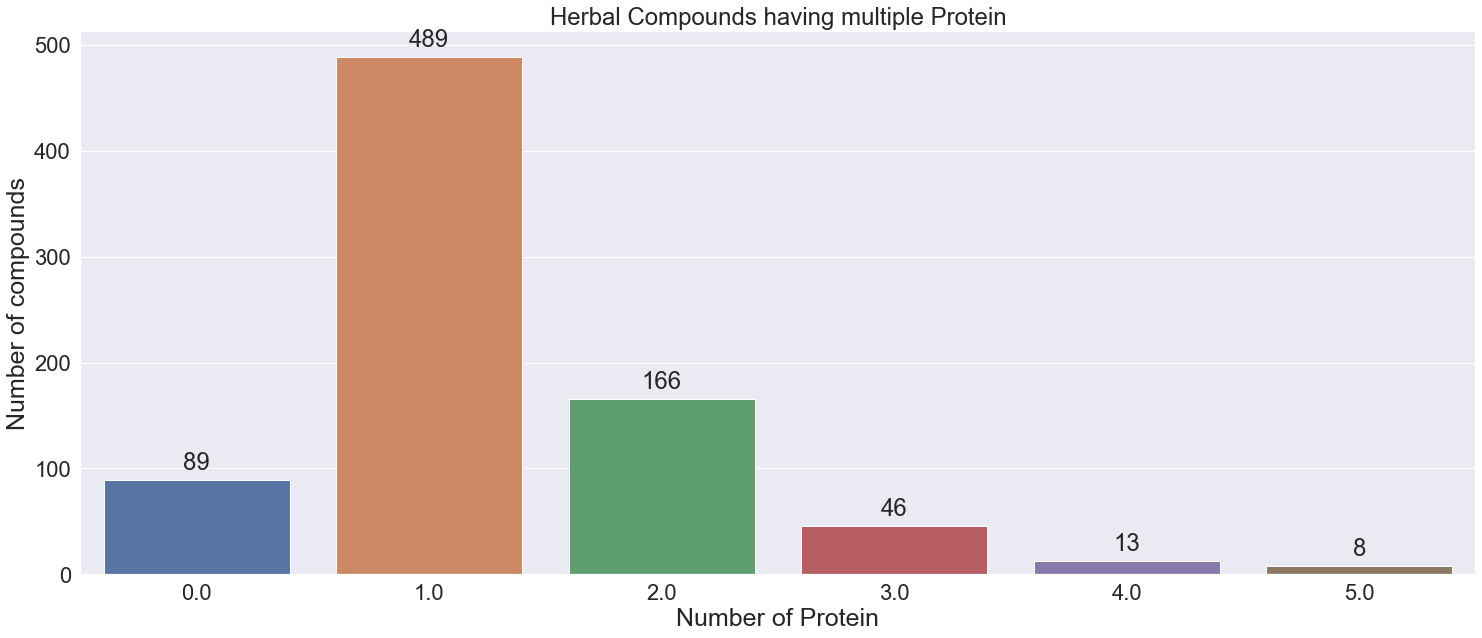

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
rowSums = hasil_predict.sum(axis=1)
multiLabel_counts = rowSums.value_counts()
# multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(25,10))
ax = sns.barplot(x = multiLabel_counts.index,y=multiLabel_counts.values)
plt.title("Herbal Compounds having multiple Protein")
plt.ylabel('Number of compounds', fontsize=25)
plt.xlabel('Number of Protein', fontsize=25)
#adding the text labels
rects = ax.patches
labels = [89,489,166,46,13,8]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [42]:
hasil_predict2 = hasil_predict.iloc[:,0:10]
hasil_predict2.sum()[hasil_predict2.sum()>0].sort_values(ascending=False)

TNFA_HUMAN     385.0
IL6_HUMAN      348.0
IL8_HUMAN      119.0
IL1B_HUMAN     116.0
IFNG_HUMAN      37.0
IL2_HUMAN       26.0
CCL2_HUMAN       8.0
IL12B_HUMAN      7.0
CCL5_HUMAN       5.0
dtype: float32

In [43]:
kelasdata.sum()
# kelasdata.sum(axis=0).sort_values()
# kelasdata.sum()[kelasdata.sum()==1]

CCL2_HUMAN       5
CCL5_HUMAN       3
IL8_HUMAN       49
CXL10_HUMAN      2
IL2_HUMAN        7
IL6_HUMAN       10
IL1B_HUMAN       9
TNFA_HUMAN     165
IL12B_HUMAN      5
IFNG_HUMAN       2
dtype: int64

## Hasil Prediksi CIRCULAR

In [62]:
hasil_predict.iloc[:,0:10].sum()

CCL2_HUMAN       8.0
CCL5_HUMAN      13.0
IL8_HUMAN       78.0
CXL10_HUMAN      0.0
IL2_HUMAN       17.0
IL6_HUMAN       57.0
IL1B_HUMAN      14.0
TNFA_HUMAN     427.0
IL12B_HUMAN     31.0
IFNG_HUMAN       0.0
dtype: float32

In [65]:
multiLabel_counts

1.0    560
0.0    211
2.0     35
3.0      5
dtype: int64

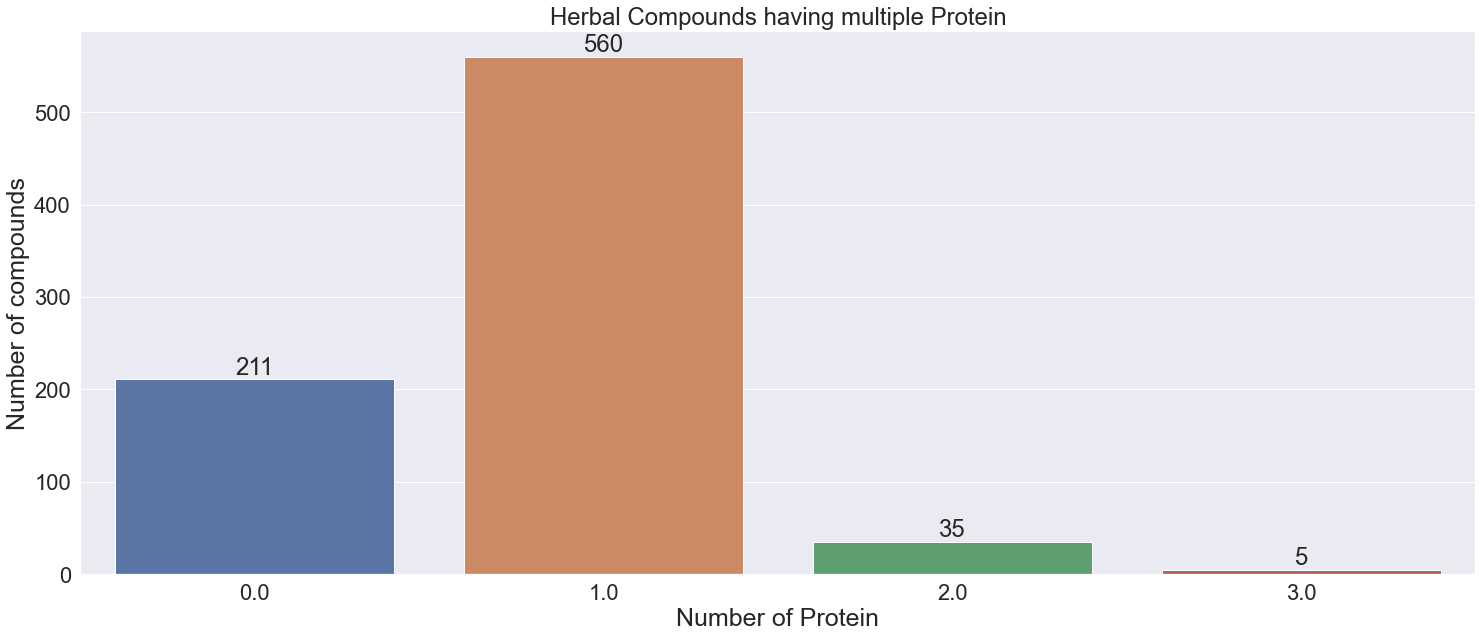

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
rowSums = hasil_predict.iloc[:,0:10].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
# multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(25,10))
ax = sns.barplot(x = multiLabel_counts.index, y = multiLabel_counts.values)
plt.title("Herbal Compounds having multiple Protein")
plt.ylabel('Number of compounds', fontsize=25)
plt.xlabel('Number of Protein', fontsize=25)
#adding the text labels
rects = ax.patches
labels = [211,560,35,5]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
plt.show()

In [59]:
hasil_prediksi = hasil_predict.drop('Senyawa',axis=1)

In [60]:
hasil_prediksi.sum()[hasil_prediksi.sum()>0].sort_values(ascending=False)[:20]

TNFA_HUMAN     427.0
IL8_HUMAN       78.0
IL6_HUMAN       57.0
IL12B_HUMAN     31.0
IL2_HUMAN       17.0
IL1B_HUMAN      14.0
CCL5_HUMAN      13.0
CCL2_HUMAN       8.0
dtype: float32

In [61]:
kelasdata.sum()
# hasil_predict.sum()[hasil_predict.sum()>0].index.values

CCL2_HUMAN       5
CCL5_HUMAN       3
IL8_HUMAN       49
CXL10_HUMAN      2
IL2_HUMAN        7
IL6_HUMAN       10
IL1B_HUMAN       9
TNFA_HUMAN     165
IL12B_HUMAN      5
IFNG_HUMAN       2
dtype: int64

# AVERAGE PRECISION

In [134]:
#Load Model
from tensorflow.keras.models import load_model
sae_dnn_model_pubchem = load_model('COVID_SAE-DNN_PUBCHEM_TUNED_New2.h5')
sae_dnn_model_circular = load_model('COVID_SAE-DNN_CIRCULAR_TUNED_New2.h5')

In [135]:
#Train SAE-DNN with BEST HP 
acc_results_tuned = list()
f1_results_tuned = list()
train_index_arr = list()
test_index_arr = list()
prec_results_tuned = list()
rec_results_tuned = list()
yhat_arr = list()
# define evaluation procedure
i=0
np.random.seed(123)
cv = IterativeStratification(n_splits=10, random_state = 123)
# enumerate folds
for train_ix, test_ix in cv.split(X_pc,Y):
    # prepare data
    train_index_arr.append(train_ix)
    test_index_arr.append(test_ix)
    X_train, X_test = X_pc.iloc[train_ix,:], X_pc.iloc[test_ix,:]
    y_train, y_test = Y[train_ix], Y[test_ix]
    # make a prediction on the test set
    yhat = sae_dnn_model_pubchem.predict(X_test)
    # round probabilities to class labels
    yhat = yhat.round()
    yhat_arr.append(yhat)
    # calculate metrics
    acc = accuracy_score(y_test, yhat)
    f1 = f1_score(y_test, yhat, average='samples')
    prec = precision_score(y_test, yhat, average='samples')
    rec = recall_score(y_test, yhat, average='samples')
    # store result
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    acc_results_tuned.append(acc)
    f1_results_tuned.append(f1)
    prec_results_tuned.append(prec)
    rec_results_tuned.append(rec)
    i=i+1
print("Accuracy array:", acc_results_tuned)
print("F1 array:", f1_results_tuned)
print("Precision array:", prec_results_tuned)
print("Recall array:", rec_results_tuned)

CV number:  0
accuracy of :>0.909
F1 of :>0.970
Precision of :>0.955
Recall of :>1.000
CV number:  1
accuracy of :>0.962
F1 of :>0.987
Precision of :>0.981
Recall of :>1.000
CV number:  2
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  3
accuracy of :>0.923
F1 of :>0.954
Precision of :>0.949
Recall of :>0.962
CV number:  4
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  5
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  6
accuracy of :>0.958
F1 of :>0.958
Precision of :>0.958
Recall of :>0.958
CV number:  7
accuracy of :>0.960
F1 of :>0.987
Precision of :>0.980
Recall of :>1.000
CV number:  8
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  9
accuracy of :>0.880
F1 of :>0.907
Precision of :>0.900
Recall of :>0.920
Accuracy array: [0.9090909090909091, 0.9615384615384616, 1.0, 0.9230769230769231, 1.0, 1.0, 0.9583333333333334, 0.96, 1.0, 0.88]
F1 array: [0.9696969696969696, 0.9871794871794871, 1.0, 0.9538461538461539, 1.0, 1.0, 0.9583333333333334, 0.9866666666666666, 1.0, 0.9066666666666666]
Precision array: [0.9545454545454546, 0.9807692307692307, 1.0, 0.9487179487179487, 1.0, 1.0, 0.9583333333333334, 0.98, 1.0, 0.9]
Recall array: [1.0, 1.0, 1.0, 0.9615384615384616, 1.0, 1.0, 0.9583333333333334, 1.0, 1.0, 0.92]


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# For each class
precision1 = dict()
recall1= dict()
average_precision1 = dict()
for i in range(10):
    precision1[i], recall1[i], _ = precision_recall_curve(y_test[:, i], yhat[:, i])
    average_precision1[i] = average_precision_score(y_test[:, i], yhat[:, i])

# A "micro-average": quantifying score on all classes jointly
precision1["micro"], recall1["micro"], _ = precision_recall_curve(
    y_test.ravel(), yhat.ravel()
)
average_precision1["micro"] = average_precision_score(y_test, yhat, average="micro")


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_rankin

In [138]:
#Train SAE-DNN with BEST HP 
acc_results_tuned = list()
f1_results_tuned = list()
prec_results_tuned = list()
rec_results_tuned = list()
# define evaluation procedure
i=0

np.random.seed(123)
cv = IterativeStratification(n_splits=10, random_state = 123)
# enumerate folds
for train_ix, test_ix in cv.split(X_cl,Y):
    # prepare data
    X_train, X_test = X_cl.iloc[train_ix,:], X_cl.iloc[test_ix,:]
    y_train, y_test = Y[train_ix], Y[test_ix]
    # make a prediction on the test set
    yhat = sae_dnn_model_circular.predict(X_test)
    # round probabilities to class labels
    yhat = yhat.round()
    # calculate metrics
    acc = accuracy_score(y_test, yhat)
    f1 = f1_score(y_test, yhat, average='samples')
    prec = precision_score(y_test, yhat, average='samples')
    rec = recall_score(y_test, yhat, average='samples')
    # store result
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    acc_results_tuned.append(acc)
    f1_results_tuned.append(f1)
    prec_results_tuned.append(prec)
    rec_results_tuned.append(rec)
    i=i+1
print("Accuracy array:", acc_results_tuned)
print("F1 array:", f1_results_tuned)
print("Precision array:", prec_results_tuned)
print("Recall array:", rec_results_tuned)

CV number:  0
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  1
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  2
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  3
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  4
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  5
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  6
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  7
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  8
accuracy of :>1.000
F1 of :>1.000
Precision of :>1.000
Recall of :>1.000
CV number:  9
accuracy of :>0.880
F1 of :>0.880
Precision of :>0.880
Recall of :>0.880
Accuracy array: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.88]
F1 array: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.88]


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:

# For each class
precision2 = dict()
recall2= dict()
average_precision2 = dict()
for i in range(10):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test[:, i], yhat[:, i])
    average_precision2[i] = average_precision_score(y_test[:, i], yhat[:, i])

# A "micro-average": quantifying score on all classes jointly
precision2["micro"], recall2["micro"], _ = precision_recall_curve(
    y_test.ravel(), yhat.ravel()
)
average_precision2["micro"] = average_precision_score(y_test, yhat, average="micro")


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_rankin

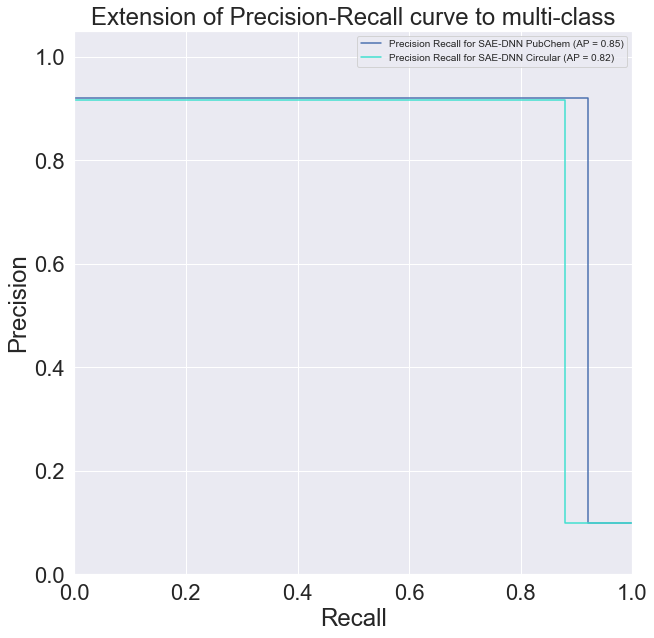

In [140]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 10))
display = PrecisionRecallDisplay(
    recall=recall1["micro"],
    precision=precision1["micro"],
    average_precision=average_precision1["micro"],
)
display.plot(ax = ax, name = 'Precision Recall for SAE-DNN PubChem')
_ = display.ax_.set_title("Micro-averaged over all classes")


display = PrecisionRecallDisplay(
    recall=recall2["micro"],
    precision=precision2["micro"],
    average_precision=average_precision2["micro"],
)
display.plot(ax = ax ,name = 'Precision Recall for SAE-DNN Circular', color='turquoise')
_ = display.ax_.set_title("Micro-averaged over all classes")


# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best", prop={'size': 10})
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

In [24]:
#Train SAE-DNN
acc_results = list()
f1_results = list()
prec_results = list()
rec_results = list()
print("finding sae weights....")
ti0 = time.time()

sae_weights_maccs = sae_model(xt = X_mc, hl_node = 1024, af = "relu", lr = 0.01, opt =  "adam", num_layers = 3,
                              do = 0.5, fr_node= 0.5) 

ti1 = time.time()
print('done, processing time:', ti1-ti0)
# define evaluation procedure
i=0
t0 = time.time()
# enumerate folds
# np.seed(123)
np.random.seed(123)
cv = IterativeStratification(n_splits=10, random_state = 123)
for train_ix, test_ix in cv.split(X_mc,Y):
    # prepare data
    X_train2, X_test2 = X_mc.iloc[train_ix,:], X_mc.iloc[test_ix,:]
    y_train2, y_test2 = Y[train_ix], Y[test_ix]
    # define model
    model = dnn_model(xt = X_train2, sae_weights = sae_weights_maccs,  hl_node = 1024, af = "relu", lr = 0.01, opt =  "adam", num_layers = 3,
                              do = 0.5, fr_node= 0.5)
    # fit model
    model.fit(X_train2, y_train2, verbose=False, epochs=100)
    # make a prediction on the test set
    yhat = model.predict(X_test2)
    # round probabilities to class labels
    yhat = yhat.round()
    # calculate metrics
    acc = accuracy_score(y_test2, yhat)
    f1 = f1_score(y_test2, yhat, average='samples')
    prec = precision_score(y_test2, yhat, average='samples')
    rec = recall_score(y_test2, yhat, average='samples')
    # store result
    print("CV number: ", i)
    print('accuracy of :>%.3f' % acc)
    print('F1 of :>%.3f' % f1)
    print('Precision of :>%.3f' % prec)
    print('Recall of :>%.3f' % rec)
    acc_results.append(acc)
    f1_results.append(f1)
    prec_results.append(prec)
    rec_results.append(rec)
    i=i+1
t1 = time.time()
print("waktu proses ", t1-t0)
print("Accuracy array:", acc_results)
print("F1 array:", f1_results)
print("Precision array:", prec_results)
print("Recall array:", rec_results)
#save model
model.save("SAE-DNN_MACCS_Pak Sony.h5")


finding sae weights....
done, processing time: 18.634377479553223


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  0
accuracy of :>0.098
F1 of :>0.287
Precision of :>0.512
Recall of :>0.243


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  1
accuracy of :>0.099
F1 of :>0.285
Precision of :>0.461
Recall of :>0.287


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  2
accuracy of :>0.084
F1 of :>0.253
Precision of :>0.480
Recall of :>0.212
CV number:  3
accuracy of :>0.078
F1 of :>0.260
Precision of :>0.439
Recall of :>0.275


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  4
accuracy of :>0.106
F1 of :>0.369
Precision of :>0.593
Recall of :>0.354


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  5
accuracy of :>0.061
F1 of :>0.186
Precision of :>0.360
Recall of :>0.202


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  6
accuracy of :>0.059
F1 of :>0.168
Precision of :>0.304
Recall of :>0.140


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  7
accuracy of :>0.033
F1 of :>0.174
Precision of :>0.331
Recall of :>0.153


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  8
accuracy of :>0.071
F1 of :>0.205
Precision of :>0.369
Recall of :>0.183


D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV number:  9
accuracy of :>0.076
F1 of :>0.261
Precision of :>0.429
Recall of :>0.224
waktu proses  182.6812219619751
Accuracy array: [0.0975609756097561, 0.0989010989010989, 0.08433734939759036, 0.07792207792207792, 0.10606060606060606, 0.06097560975609756, 0.058823529411764705, 0.03333333333333333, 0.07142857142857142, 0.0759493670886076]
F1 array: [0.2868448257234299, 0.28513170590093667, 0.25267843936518636, 0.2598136295595183, 0.3690207168549414, 0.1863868103913481, 0.1680141399432057, 0.17441689997245552, 0.20467026637494823, 0.2606560935956282]
Precision array: [0.5123983739837398, 0.46081525312294547, 0.48032128514056227, 0.4385178313749742, 0.5934343434343435, 0.3604602714358812, 0.3037440838404328, 0.3313227513227513, 0.36921768707483, 0.4293248945147679]
Recall array: [0.24266208046695853, 0.2869947638988942, 0.21239182504242743, 0.27489645489645487, 0.35448127827806974, 0.20179055361982193, 0.13981227106227107, 0.15298540965207633, 0.18344671201814058, 0.22397597128609786]

D:\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
